In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Загрузка данных
data = pd.read_csv('clients.csv')
data.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


In [61]:
# Предварительный анализ, оцениваем, какие столбцы, что они могли бы означать, их тип, пропущенные значения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       195 non-null    int64  
 1   Building                 195 non-null    int64  
 2   Year of sale             195 non-null    int64  
 3   Month of sale            195 non-null    int64  
 4   Type of property         195 non-null    object 
 5   Property number          195 non-null    int64  
 6   Area (ft.)               195 non-null    float64
 7   Price                    195 non-null    object 
 8   Status                   195 non-null    object 
 9   Customer ID              195 non-null    object 
 10  Entity                   195 non-null    object 
 11  Name                     195 non-null    object 
 12  Surname                  195 non-null    object 
 13  Age at time of purchase  178 non-null    float64
 14  Age Interval             1

In [62]:
data.describe()  # оцениваем статистические показатели

,ID,Building,Year of sale,Month of sale,Property number,Area (ft.),Age at time of purchase,Y,M,D,Deal satisfaction
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,178.000000,178.000000,178.000000,178.000000,195.000000
mean,2591.425641,2.564103,2006.333333,7.271795,27.328205,899.867128,46.151685,1960.325843,6.752809,15.449438,3.605128
std,1244.617996,1.243434,1.072941,3.378674,14.830832,261.489550,12.841692,12.835575,3.450312,8.457285,1.363355
min,1002.000000,1.000000,2004.000000,1.000000,1.000000,410.710000,19.000000,1931.000000,1.000000,1.000000,1.000000
25%,2003.500000,2.000000,2006.000000,4.000000,15.000000,739.860000,37.000000,1950.250000,4.000000,8.000000,3.000000
50%,2054.000000,2.000000,2007.000000,8.000000,27.000000,785.480000,45.000000,1962.000000,6.000000,15.000000,4.000000
75%,3048.500000,3.000000,2007.000000,10.000000,39.000000,1075.460000,55.000000,1969.750000,9.750000,23.750000,5.000000
max,5051.000000,5.000000,2010.000000,12.000000,59.000000,1942.500000,76.000000,1986.000000,15.000000,31.000000,5.000000


In [63]:
data.isnull().sum()  # анализируем пропущенные значения

ID                          0
Building                    0
Year of sale                0
Month of sale               0
Type of property            0
Property number             0
Area (ft.)                  0
Price                       0
Status                      0
Customer ID                 0
Entity                      0
Name                        0
Surname                     0
Age at time of purchase    17
Age Interval               17
Y                          17
M                          17
D                          17
Gender                     17
Country                     0
State                      14
Purpose                     0
Deal satisfaction           0
Mortgage                    0
Source                      0
dtype: int64

In [64]:
# Удаление всех строк с пропускоми, решила все таки удалить
data.dropna(inplace=True)

In [65]:
# Проверка на пропуски после удаления
print("Количество пропусков после удаления:")
print(data.isnull().sum())

Количество пропусков после удаления:
ID                         0
Building                   0
Year of sale               0
Month of sale              0
Type of property           0
Property number            0
Area (ft.)                 0
Price                      0
Status                     0
Customer ID                0
Entity                     0
Name                       0
Surname                    0
Age at time of purchase    0
Age Interval               0
Y                          0
M                          0
D                          0
Gender                     0
Country                    0
State                      0
Purpose                    0
Deal satisfaction          0
Mortgage                   0
Source                     0
dtype: int64


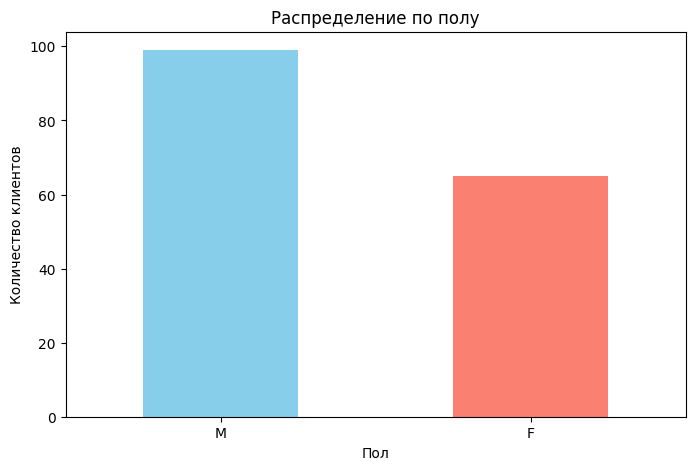

In [95]:
# Анализ по полу, мужчин таки больше
plt.figure(figsize=(8, 5))
gender_counts = data['Gender'].value_counts()
gender_counts.plot(kind='bar', color=['skyblue', 'salmon'], title='Распределение по полу')
plt.xlabel('Пол')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=0)
plt.show()

In [67]:
# рассчитываем процент мужчин и женщин

# подсчитываем количество мужчин и женщин
gender_counts = data['Gender'].value_counts()

# общее количество записей
total_count = len(data)

# Рассчитываем проценты
male_percentage = (gender_counts.get('M', 0) / total_count) * 100
female_percentage = (gender_counts.get('F', 0) / total_count) * 100

print(f"Процент мужчин: {male_percentage:.2f}%")
print(f"Процент женщин: {female_percentage:.2f}%")


Процент мужчин: 60.37%
Процент женщин: 39.63%


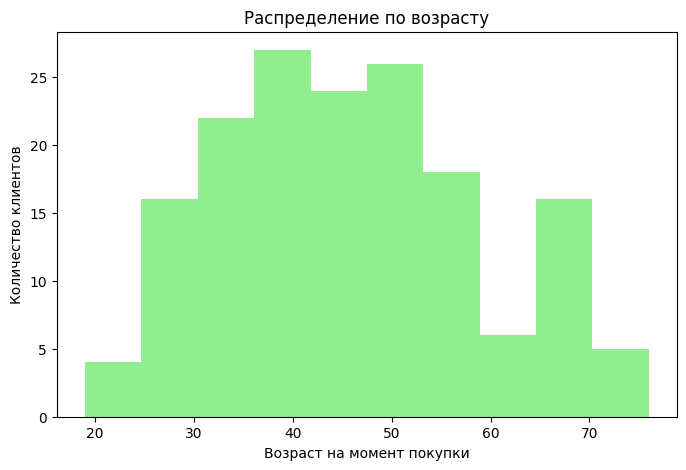

In [96]:
# Анализ по возрасту, анализируем пики
plt.figure(figsize=(8, 5))
data['Age at time of purchase'].hist(bins=10, color='lightgreen')
plt.title('Распределение по возрасту')
plt.xlabel('Возраст на момент покупки')
plt.ylabel('Количество клиентов')
plt.grid(False)
plt.show()

In [69]:
# важно рассчитать в каком возрасте совершается больше всего покупок
# группировка по возрасту и подсчет количества сделок
age_counts = data['Age at time of purchase'].value_counts().sort_index()

In [70]:
# Определение возраста с максимальным количеством покупок
max_age = age_counts.idxmax()
max_count = age_counts.max()
print(f'Возраст, в котором совершается больше всего покупок: {max_age} лет (количество покупок: {max_count})')

Возраст, в котором совершается больше всего покупок: 48.0 лет (количество покупок: 11)


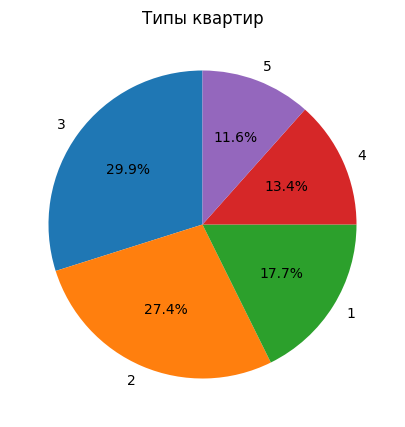

In [71]:
# анализ квартир, по всей видимости, это количество комнат
plt.figure(figsize=(8, 5))
apartment_types = data['Building'].value_counts()
apartment_types.plot(kind='pie', autopct='%1.1f%%', title='Типы квартир', startangle=90)
plt.ylabel('')  # Убираем подпись y
plt.show()

In [72]:
# Проверка типа данных в столбце Price
print(data['Price'].dtype)

object


In [73]:
# Преобразование столбца Price в числовой тип
data['Price'] = pd.to_numeric(data['Price'].str.replace('$', '').str.replace(',', ''), errors='coerce')


In [74]:
# Проверка на наличие NaN после преобразования
print(data['Price'].isna().sum())

0


In [75]:
# Рассчет средней цены по типам квартир, она больше для 1-комнатных, затем, для 2 и 4 комнатных приблиз. одинакова
# самая низкая стоимость у 3- и 5 комнатных (тоже приблиз. одинакова)
average_price_by_type = data.groupby('Building')['Price'].mean()
print(average_price_by_type)

Building
1    295643.631379
2    275012.331778
3    257121.385918
4    276454.467727
5    250373.861579
Name: Price, dtype: float64


In [76]:
# рассчитываем среднюю площадь по типам квартир
# группируем данные по типу квартиры (Building) и рассчитываем среднюю площадь (Area (ft.))
average_area_by_building = data.groupby('Building')['Area (ft.)'].mean()

average_area_by_building

Building
1    996.237586
2    913.997778
3    857.344286
4    942.686364
5    812.309474
Name: Area (ft.), dtype: float64

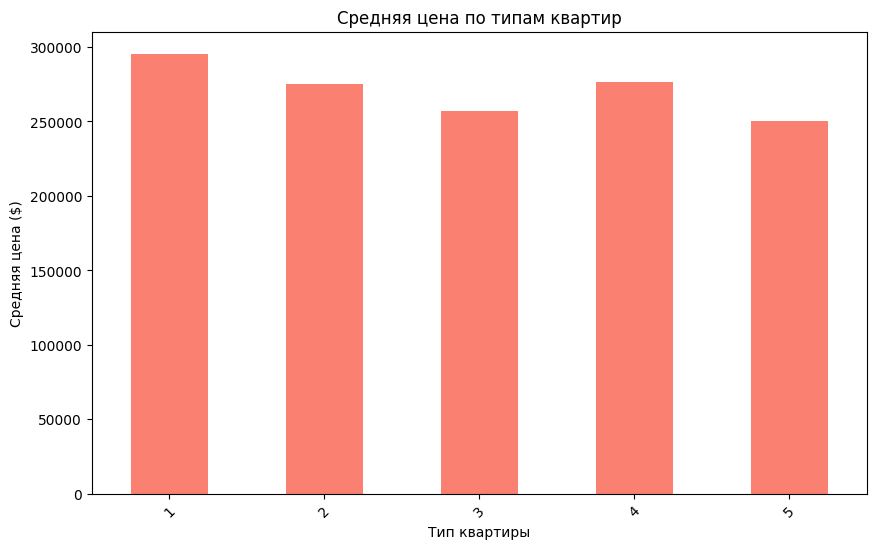

In [77]:
plt.figure(figsize=(10, 6))
average_price_by_type = data.groupby('Building')['Price'].mean()
average_price_by_type.plot(kind='bar', color='salmon')
plt.title('Средняя цена по типам квартир')
plt.xlabel('Тип квартиры')
plt.ylabel('Средняя цена ($)')
plt.xticks(rotation=45)
plt.show()

In [78]:
# Рассчет важных для анализа средних значений: средний возраст клиента, средняя площадь квартиры, средний чек
average_age = data['Age at time of purchase'].mean()
average_area = data['Area (ft.)'].mean()
average_price = data['Price'].mean()

print(f"Средний возраст клиентов: {average_age}")
print(f"Средняя площадь квартиры: {average_area}")
print(f"Средний чек: {average_price}")

Средний возраст клиентов: 45.457317073170735
Средняя площадь квартиры: 903.6807317073171
Средний чек: 270654.0842073171


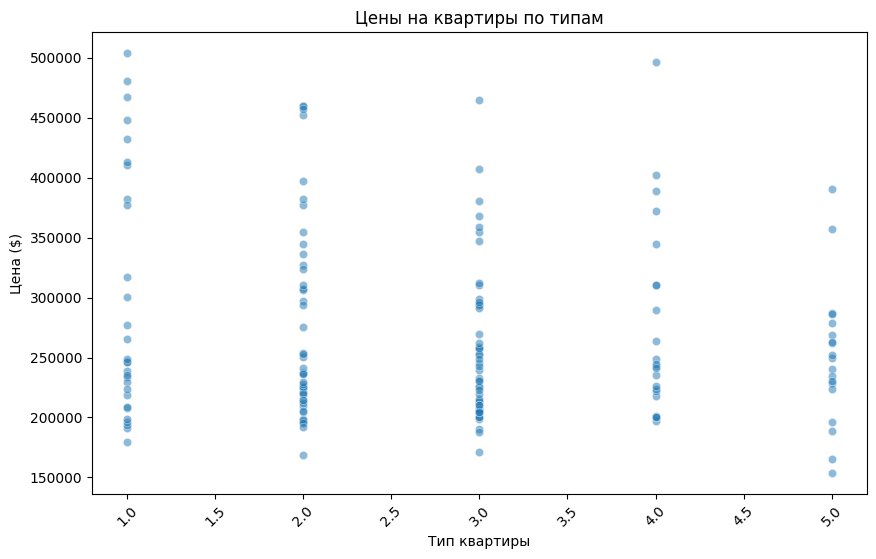

In [79]:
# диаграмма рассеяния показывает, как распределяются цены внутри каждого типа квартиры
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Building', y='Price', data=data, alpha=0.5)
plt.title('Цены на квартиры по типам')
plt.xlabel('Тип квартиры')
plt.ylabel('Цена ($)')
plt.xticks(rotation=45)
plt.show()


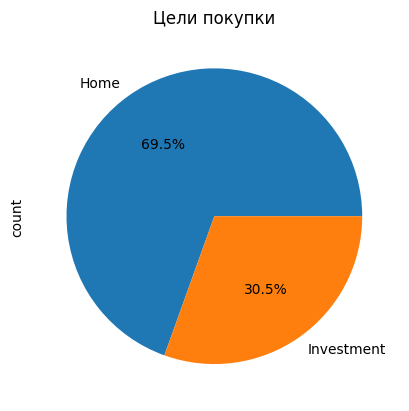

In [80]:
# Анализ целей покупки, большинство покупает для проживания
purchase_purpose = data['Purpose'].value_counts()
purchase_purpose.plot(kind='pie', autopct='%1.1f%%', title='Цели покупки')
plt.show()


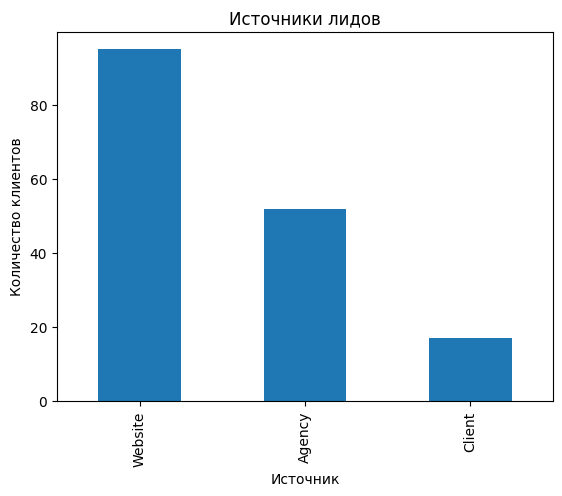

In [81]:
# Анализ источников лидов, то есть всех каналов, по которым вам поступают потенциальные клиенты
# c большим отрывом - покупки через интернет
lead_sources = data['Source'].value_counts()
lead_sources.plot(kind='bar', title='Источники лидов')
plt.xlabel('Источник')
plt.ylabel('Количество клиентов')
plt.show()

In [82]:
# теперь посчитаем проценты
# подсчитываем количество записей для каждого источника
lead_sources = data['Source'].value_counts()

# Рассчитываем общее количество записей
total_count = len(data)

# рассчитываем проценты для каждого источника
lead_sources_percentage = (lead_sources / total_count) * 100

# Выводим результаты
print(lead_sources_percentage)


Source
Website    57.926829
Agency     31.707317
Client     10.365854
Name: count, dtype: float64


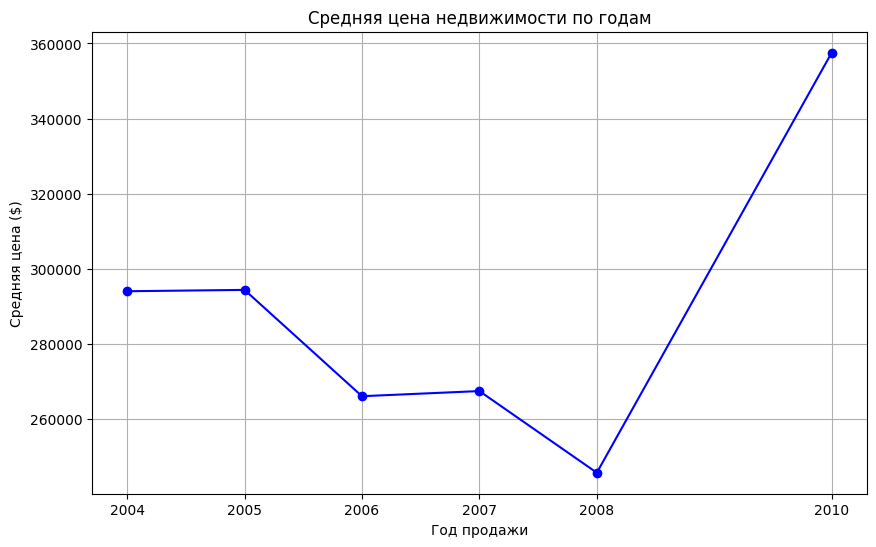

In [83]:
# по-видимому, существенная информация о том, как рынок менялся со временем
# это может быть важным, если проанализировать, какие другие эонимические либо политические события 
# происходили в 2008 и в 2010 году (соответственно самая низкая и высокая стоимости жилья)

# Группировка по году продажи и вычисление средней цены
average_price_per_year = data.groupby('Year of sale')['Price'].mean().reset_index()

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(average_price_per_year['Year of sale'], average_price_per_year['Price'], marker='o', linestyle='-', color='blue')
plt.title('Средняя цена недвижимости по годам')
plt.xlabel('Год продажи')
plt.ylabel('Средняя цена ($)')
plt.grid(True)
plt.xticks(average_price_per_year['Year of sale'])  # Убедитесь, что все годы отображаются
plt.show()

In [84]:
# Вывод уникальных значений в столбце Entity, просто, чтоб понять, что это такое
# наверное, это означает, что жилье приобреталось физическими лицами для проживания, а не организациями для офисных работ
unique_entities = data['Entity'].unique()
print("Уникальные значения в столбце 'Entity':")
print(unique_entities)

Уникальные значения в столбце 'Entity':
['Individual']


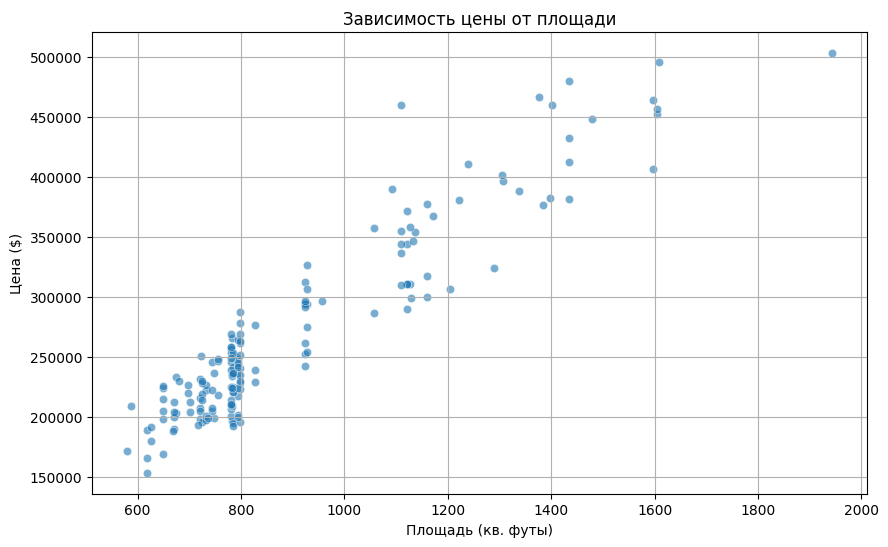

In [85]:
# проанализировала зависимость цены от площади
# Визуализация: Диаграмма рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area (ft.)', y='Price', data=data, alpha=0.6)
plt.title('Зависимость цены от площади')
plt.xlabel('Площадь (кв. футы)')
plt.ylabel('Цена ($)')
plt.grid(True)
plt.show()

In [86]:
# Расчет корреляции
correlation = data['Price'].corr(data['Area (ft.)'])
print(f'Коэффициент корреляции между ценой и площадью: {correlation:.2f}')

Коэффициент корреляции между ценой и площадью: 0.94


In [87]:
# важно знать, жители каких стран приобретают жилье в Америке
# Группировка по стране и подсчет количества клиентов
country_counts = data['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Number of Clients']


In [88]:
# Выбор топ-10 стран для визуализации
top_countries = country_counts.head(10)
top_countries

,Country,Number of Clients
0,USA,157
1,USA,3
2,UK,2
3,Germany,1
4,Belgium,1


In [89]:
# значит, теперь надо определиться со штатом
# Группировка по штату и подсчет количества клиентов
state_counts = data['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Number of Clients']

# Сортировка по количеству клиентов
state_counts = state_counts.sort_values(by='Number of Clients', ascending=False)


In [90]:
# Выбор топ-10 штатов для визуализации
top_states = state_counts.head(10)
top_states

,State,Number of Clients
0,California,106
1,Nevada,13
2,Arizona,11
3,Oregon,11
4,Colorado,11
5,Utah,6
6,Virginia,4
7,Kansas,1
8,Wyoming,1


In [91]:
# Важна информация о наличии ипотеки, получилось, что большинство не пользуется ипотекой (прибл. 66%)
# Подсчет количества клиентов с ипотекой и без
mortgage_counts = data['Mortgage'].value_counts().reset_index()
mortgage_counts.columns = ['Mortgage Status', 'Number of Clients']

# Процент клиентов с ипотекой
mortgage_counts['Percentage'] = (mortgage_counts['Number of Clients'] / mortgage_counts['Number of Clients'].sum()) * 100
mortgage_counts['Percentage'] 

0    65.853659
1    34.146341
Name: Percentage, dtype: float64

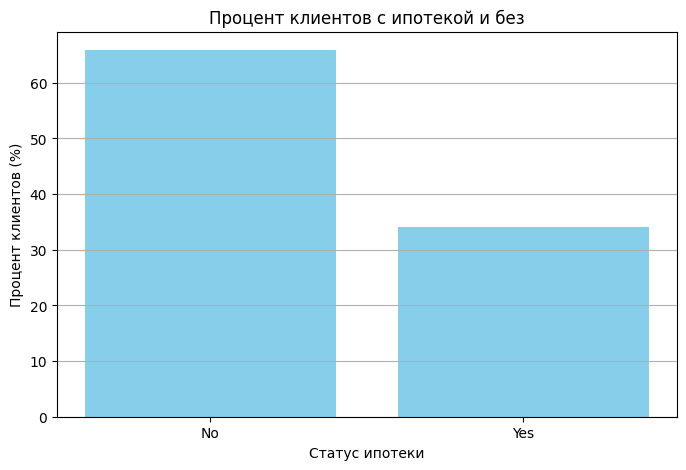

In [92]:
# Построение графика
plt.figure(figsize=(8, 5))
plt.bar(mortgage_counts['Mortgage Status'], mortgage_counts['Percentage'], color='skyblue')
plt.title('Процент клиентов с ипотекой и без')
plt.xlabel('Статус ипотеки')
plt.ylabel('Процент клиентов (%)')
plt.grid(axis='y')
plt.show()

In [93]:
# чтобы понять, почему, надо сравнить цены
# Сравнение средних цен
price_with_mortgage = data[data['Mortgage'] == 'Yes']['Price'].mean()
price_without_mortgage = data[data['Mortgage'] == 'No']['Price'].mean()

print(f'Средняя цена для клиентов с ипотекой: ${price_with_mortgage:.2f}')
print(f'Средняя цена для клиентов без ипотеки: ${price_without_mortgage:.2f}')


Средняя цена для клиентов с ипотекой: $279599.59
Средняя цена для клиентов без ипотеки: $266015.68


In [94]:
""" Таким образом: целевые клиенты: 
Пол: , 60%  — мужчины,  40% клиентов — женщины
Средний возраст клиентов — 45 лет, возраст, в котором совершается больше всего покупок: 48 лет
Тип квартиры: Наиболее популярный тип квартиры — однокомнатная (30% всех сделок)
Ее средняя цена 295644  долларов, средняя площадь 996 футов
Площадь: средняя площадь квартиры составляет 904 фута
Средний чек: Средний чек составляет 270654 долларов
Цель покупки: 70% клиентов покупают квартиру для проживания, 30% — для инвестиций
Источник лида: наиболее эффективный источник — Website (58% всех клиентов)
Ипотека: только 34%  клиентов пользуется ипотекой 

Итак, целевой клиент- мужчина 48 лет, проживающий в Америке, штат Калифорния, покупающий однокомнатную квартиру для проживания за 295644 долларов, 
площадью 996 футов, без ипотеки, которую нашел в интернете 
"""


' Таким образом: целевые клиенты: \nПол: , 60%  — мужчины,  40% клиентов — женщины\nСредний возраст клиентов — 45 лет, возраст, в котором совершается больше всего покупок: 48 лет\nТип квартиры: Наиболее популярный тип квартиры — однокомнатная (30% всех сделок)\nЕе средняя цена 295644  долларов, средняя площадь 996 футов\nПлощадь: средняя площадь квартиры составляет 904 фута\nСредний чек: Средний чек составляет 270654 долларов\nЦель покупки: 70% клиентов покупают квартиру для проживания, 30% — для инвестиций\nИсточник лида: наиболее эффективный источник — Website (58% всех клиентов)\nИпотека: только 34%  клиентов пользуется ипотекой \n\nИтак, целевой клиент- мужчина 48 лет, проживающий в Америке, штат Калифорния, покупающий однокомнатную квартиру для проживания за 295644 долларов, \nплощадью 996 футов, без ипотеки, которую нашел в интернете \n'